In [1]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
import numpy as np
import pandas as pd
data_folder = os.path.join('..', 'data')
file_name = "Data"

## Simple match rating

To calculate the short term form, we will use the concept of a Match Rating. It takes one or more stats from the last few games to calculate the form difference between the two teams. For our simple match rating, we will use the goal difference each team has for the last five matches, and calculate a match rating by a difference in accumulated Goal difference between the two teams

In [2]:
# Only run to update data file
leagues = ["E0", "E1", "E2", "E3"]
#leagues = ["E0"]
start_year, end_year = 2005, 2024
util.fetch_data_into_file(
    data_folder=data_folder,
    file_name=file_name,
    start_year=start_year,
    end_year=end_year,
    leagues=leagues,
)

Data fetched and saved to ../data/Data.csv


In [3]:
data = util.load_data(data_folder, file_name)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38422,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,4.0,11.0,12.0,7.0,5.0,2.0,1.0,0.0,1.0,2324
38423,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,12.0,10.0,13.0,3.0,9.0,2.0,2.0,0.0,0.0,2324
38424,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,4.0,13.0,9.0,2.0,8.0,0.0,2.0,0.0,0.0,2324
38425,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,6.0,5.0,12.0,7.0,7.0,1.0,0.0,0.0,0.0,2324


In [4]:
# cleaned data
data = util.get_cleaned_data(data)
data

/Users/eliaslysosommerseth/Documents/ntnu/4-klasse/1-semester/bologna/91261-AIII/Match-Predictor/notebooks/util/util.py:815: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns="Referee", inplace=True)  # Fjerner kolonnen Referee
/Users/eliaslysosommerseth/Documents/ntnu/4-klasse/1-semester/bologna/91261-AIII/Match-Predictor/notebooks/util/util.py:816: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # Fjerner rader med manglende verdier


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,4.0,11.0,12.0,7.0,5.0,2.0,1.0,0.0,1.0,2324
38413,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,12.0,10.0,13.0,3.0,9.0,2.0,2.0,0.0,0.0,2324
38414,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,4.0,13.0,9.0,2.0,8.0,0.0,2.0,0.0,0.0,2324
38415,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,6.0,5.0,12.0,7.0,7.0,1.0,0.0,0.0,0.0,2324


### Generating the match rating
Now the match rating is calculated by the following formula:
 * sum up the goal difference of the last 6 matches for each team and do the following:
  * Home_team_goal_difference - Away_team_goal_difference = match_rating

This is done for every season and every leauge in the dataset. This i done to ensure that the matchrating only is based on the last 6 matched of the respective season and leauge. Some matches in each season and leauge will be skipped since to calculate the matchrating a team must have played at least 6 matches in the season and leauge.


In [5]:
data = util.generate_matchrating_for_each_season_and_league(data)
data

Skipped 52 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 61 matches due to insufficient previous matches.
Skipped 51 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 53 matches due to insufficient previous matches.
Skipped 61 matches due to insufficient previous matches.
Skipped 62 matches due to insufficient previous matches.
Skipped 61 matches due to insufficient previous matches.
Skipped 51 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 62 matches due to insufficient previous matches.
Skipped 60 matches due to insufficient previous matches.
Skipped 53 matches due to insufficient previous matches.
Skipped 60 matches due to insuf

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HR,AR,Season,Home Goals Last 5,Away Goals Last 5,Home Conceded Last 5,Away Conceded Last 5,Home Goal Difference Last 5,Away Goal Difference Last 5,Matchrating
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,0.0,0.0,0506,None,None,None,None,None,None,None
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,0.0,0.0,0506,None,None,None,None,None,None,None
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,0.0,0.0,0506,None,None,None,None,None,None,None
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,0.0,0.0,0506,None,None,None,None,None,None,None
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,1.0,0.0,0506,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,0.0,1.0,2324,5.0,17.0,8.0,4.0,-3.0,13.0,-16.0
38413,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,0.0,0.0,2324,16.0,10.0,10.0,9.0,6.0,1.0,5.0
38414,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,0.0,0.0,2324,4.0,11.0,7.0,11.0,-3.0,0.0,-3.0
38415,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,0.0,0.0,2324,7.0,3.0,9.0,9.0,-2.0,-6.0,4.0


In [6]:
nan_counts = data["Matchrating"].isna().sum()
print(f"Number of NaN values in Matchrating: {nan_counts}")

Number of NaN values in Matchrating: 4414


Now we can have a look at the different matchratings in the dataset.

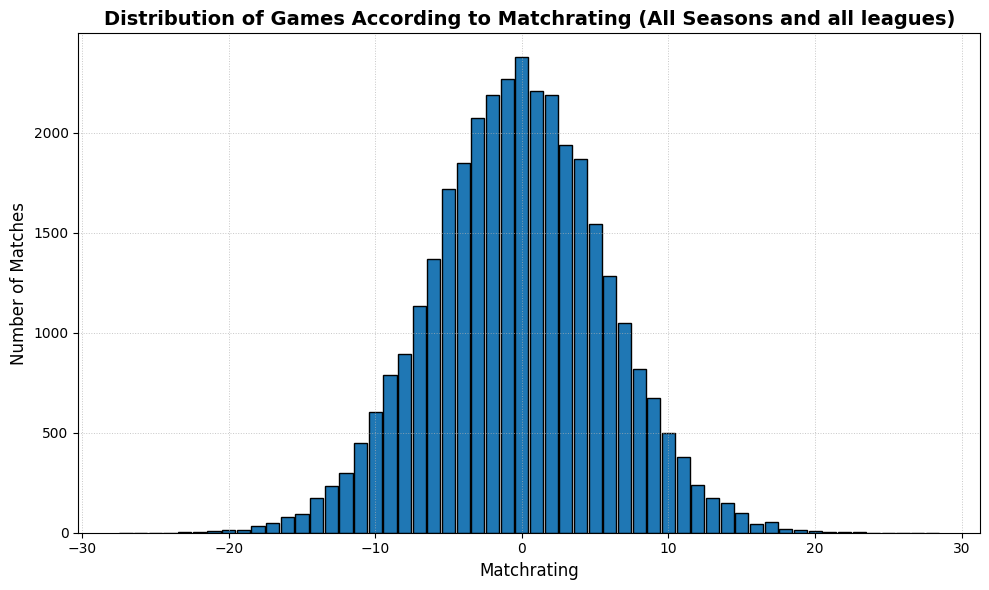

In [7]:
# Plot the histogram for all seasons combined
data_matchrating = data.copy()
data_with_matchrating_for_every_match = data_matchrating["Matchrating"].dropna()

util.plot_histogram(
    data_with_matchrating_for_every_match,
    figsize=(10, 6),
    title="Distribution of Games According to Matchrating (All Seasons and all leagues)",
    xlabel="Matchrating",
    ylabel="Number of Matches",
)

Further we can have a look at the percentage of home wins, draws and away wins for the different matchratings.

In [8]:
outcome_percentages = util.calculate_outcome_percentages(data)

# Display the resulting DataFrame
outcome_percentages

Outcome,Home Wins %,Draw %,Away Wins %,Number of Away Wins,Number of Draws,Number of Home Wins
Matchrating,,,,,,
-27.0,0.000000,0.000000,100.000000,1,0,0
-26.0,0.000000,0.000000,100.000000,1,0,0
-25.0,0.000000,0.000000,100.000000,1,0,0
-23.0,0.000000,0.000000,100.000000,3,0,0
-22.0,0.000000,33.333333,66.666667,2,1,0
-21.0,18.181818,27.272727,54.545455,6,3,2
-20.0,13.333333,26.666667,60.000000,9,4,2
-19.0,18.750000,18.750000,62.500000,10,3,3
-18.0,17.142857,28.571429,54.285714,19,10,6


As one can see in the data above 44.5 % of the matches with a matchrating of o ended in a home wins. This gives interesting information about the home advantage in football matches. 

## Evaluation

Now, lets us this match rating to predict the outcome of the matches in the dataset.

In [9]:
data.dropna(subset=["Matchrating"], inplace=True)
for index, row in data.iterrows():
	matchrating = row["Matchrating"]
	stats = outcome_percentages.loc[matchrating]
	data.at[index, 'Home Prob'] = stats['Home Wins %'] / 100
	data.at[index, 'Draw Prob'] = stats['Draw %'] / 100
	data.at[index, 'Away Prob'] = stats['Away Wins %'] / 100
data
	

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Home Goals Last 5,Away Goals Last 5,Home Conceded Last 5,Away Conceded Last 5,Home Goal Difference Last 5,Away Goal Difference Last 5,Matchrating,Home Prob,Draw Prob,Away Prob
46,E0,2005-09-17,Aston Villa,Tottenham,1.0,1.0,D,1.0,0.0,H,...,4.0,4.0,8.0,2.0,-4.0,2.0,-6.0,0.371074,0.270270,0.358656
49,E0,2005-09-17,Portsmouth,Birmingham,1.0,1.0,D,1.0,1.0,D,...,4.0,4.0,7.0,8.0,-3.0,-4.0,1.0,0.432714,0.289533,0.277753
50,E0,2005-09-17,Sunderland,West Brom,1.0,1.0,D,1.0,0.0,H,...,2.0,5.0,9.0,10.0,-7.0,-5.0,-2.0,0.424920,0.272478,0.302602
51,E0,2005-09-18,Blackburn,Newcastle,0.0,3.0,A,0.0,0.0,D,...,3.0,1.0,5.0,7.0,-2.0,-6.0,4.0,0.481799,0.268201,0.250000
53,E0,2005-09-18,Man City,Bolton,0.0,1.0,A,0.0,0.0,D,...,7.0,6.0,4.0,4.0,3.0,2.0,1.0,0.432714,0.289533,0.277753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,5.0,17.0,8.0,4.0,-3.0,13.0,-16.0,0.217949,0.384615,0.397436
38413,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,16.0,10.0,10.0,9.0,6.0,1.0,5.0,0.506485,0.247730,0.245785
38414,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,4.0,11.0,7.0,11.0,-3.0,0.0,-3.0,0.393545,0.270713,0.335742
38415,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,7.0,3.0,9.0,9.0,-2.0,-6.0,4.0,0.481799,0.268201,0.250000


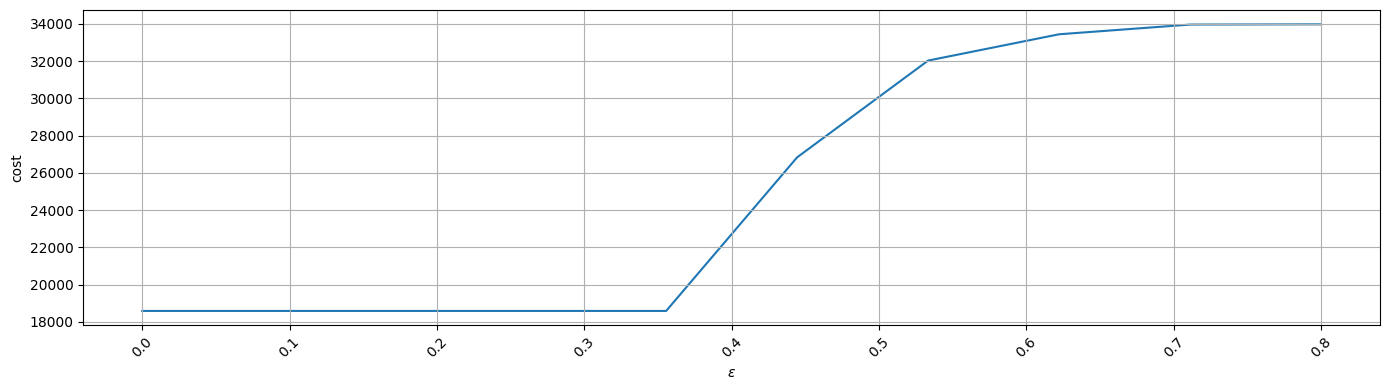

In [10]:
cost_model = util.PickCostModel(wrong=1, skipped=1)
thr_range = np.linspace(0, 0.8, 10)
cost_range = pd.Series(index=thr_range, data=[cost_model.cost(data, thr) for thr in thr_range])
util.plot_series(cost_range, figsize=figsize, xlabel=r'$\varepsilon$', ylabel='cost')

In [11]:
best_thr, best_cost = util.opt_thr(data,  cost_model, thr_range)
print(f'Best threshold: {best_thr:.2f}, corresponding cost: {best_cost:.2f}')
print(f'Hit rate: {(1 - best_cost/len(data))*100:.2f}%')

Best threshold: 0.00, corresponding cost: 18585.00
Hit rate: 45.34%


The hit rate is not better than ELO, however it is still a bit better than pure guessing. These predicitions based on individual stats are not good enough, we need to use all previous stats to get a better prediction.